# Confirmation of DAVIS dataset
    Just to make sure DAVIS is outputing the correct data
   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from vos.datasets.DAVIS import DAVIS_2017_TrainVal
from vos.datasets.video_synth import VideoSynthDataset
from vos.datasets.COCO import COCO

NOTE: The following two cells, only need to run one

In [3]:
davisroot = "/p300/videoObjSeg_dataset/DAVIS-2017-trainval-480p"
davisd = DAVIS_2017_TrainVal(davisroot, mode= "train")

data = davisd[0]
for k, v in data.items():
    print(k, ": ", v.shape)

video :  torch.Size([82, 3, 480, 854])
mask :  torch.Size([82, 12, 480, 854])
n_objects :  torch.Size([1])


In [3]:
cocoroot = "/p300/videoObjSeg_dataset/COCO-2017-train"
videod = VideoSynthDataset(
    COCO(cocoroot, mode= "train", max_n_objects= 8),
    n_frames= 2,
    affine_kwargs= dict(
        angle_max= 15.,
        translate_max= 15.,
        scale_max= 0.1, # NOTE: this is the exponent of e
        shear_max= 15.
    ),
)

data = videod[0]
for k, v in data.items():
    print(k, ": ", v.shape)

loading annotations into memory...
Done (t=34.20s)
creating index...
index created!
mask :  torch.Size([3, 9, 384, 384])
n_objects :  torch.Size([])
video :  torch.Size([3, 3, 384, 384])


tensor(4) (3, 384, 384, 9)


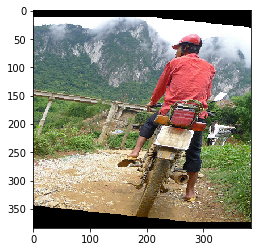

In [5]:
video = data["video"].numpy().transpose(0,2,3,1)
mask = data["mask"].numpy().transpose(0,2,3,1)
no = data["n_objects"]
print(no, mask.shape)

T, H, W, N = mask.shape
plt.imshow(video[1])

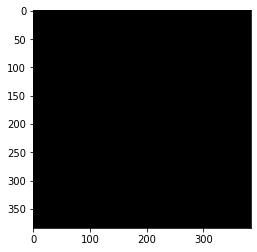

In [10]:
obj_i = 1
f_i = 1
fig = plt.figure()
plt.imshow(mask[f_i,:,:,obj_i], cmap= "gray")
plt.show()

## Conclusion
    - DAVIS dataset outputs proper masks whose valid information are at (0:n_objects+1) channel
    - Vieo Synthesize Dataset wrapper has issue, need further investigation
    
## The following code only use videod object from previous codes.

In [14]:
import torch
vdata = videod[0]
for k, v in vdata.items():
    print(k, ": ", v.shape)

mask :  torch.Size([3, 9, 384, 384])
n_objects :  torch.Size([])
video :  torch.Size([3, 3, 384, 384])


In [50]:
# Then reproducing the video synthesize dataset getitem procedure

idata = videod.dataset[0]
image = idata["image"]
m_image = idata["mask"]
print("n_objects: {}\n".format(idata["n_objects"]))

with torch.no_grad():
    video, m_video = videod.synth_videos([image], [mask])
video, m_video = video[0], m_video[0]
print("image shape: {}".format(image.shape))
print("m_image shape: {}".format(m_image.shape))
print("video shape: {}".format(video.shape)) # (T, C, H, W)
print("m_video shape: {}".format(m_video.shape))

n_objects: 4

image shape: torch.Size([3, 360, 640])
m_image shape: torch.Size([9, 360, 640])
video shape: torch.Size([3, 3, 360, 640])
m_video shape: torch.Size([3, 9, 360, 640])


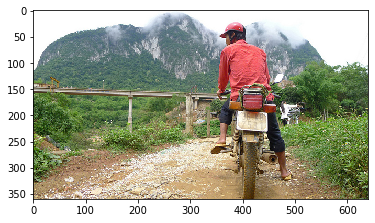

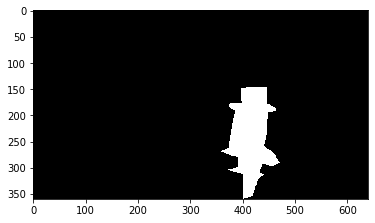

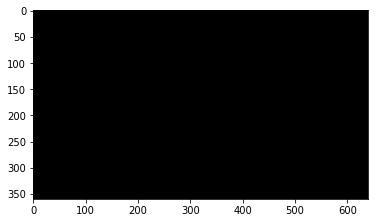

In [52]:
f_i = 1
c_i = 1
plt.imshow(image.numpy().transpose(1,2,0))
plt.figure()
plt.imshow(m_image.numpy().transpose(1,2,0)[:,:,c_i], cmap= "gray")
plt.figure()
plt.imshow(m_video.numpy().transpose(0,2,3,1)[f_i,:,:,c_i], cmap= "gray")

In [ ]:
# Dive deeper into videod.random_transform

